# German Credit Risk

Você trabalha em um banco e deve treinar um modelo que avalie o risco de conceder crédito aos clientes. Quando um cliente fizer um pedido de empréstimo, o modelo deve dizer se é seguro conceder o crédito. A base de dados contém alguns atributos cujos nomes não são tão intuitivos no seu significado. Por isso, abaixo, cito alguns e o que eu acredito que eles representam já que a fonte não contém nenhuma informação adicional sobre isso.

*   checking_status: status da **conta corrente** de um cliente.

*   savings_status: status da **poupança** de um cliente.

*   duration: tempo em meses que espera-se que o cliente pague a dívida.

*   credit_history: representam diferentes categorias ou descrições do histórico de crédito dos clientes.
    *   existing paid: esta categoria sugere que o cliente possui um histórico de crédito com créditos existentes que foram quitados.
    *   delayed previously: o cliente tem um histórico de pagamentos atrasados no passado.
    *   critical/other existing: o cliente tem um histórico de crédito crítico ou outros créditos existentes que podem afetar sua credibilidade.
    *   no credits/all paid: o cliente não tem histórico de crédito ou pagou todos os créditos anteriores.
    *   all paid: o cliente possui um histórico de crédito com todos os créditos anteriores quitados.

*   employment: indica há quanto tempo o indivíduo está empregado ou o status de seu emprego.
    *   " >=7 ": sugere que o cliente está empregado há pelo menos sete anos.
    *   "1 <= X < 4": o cliente está empregado há pelo menos um ano, mas menos de quatro anos.
    *   "4 <= X < 7": o cliente está empregado há pelo menos quatro anos, mas menos de sete anos.
    *   "unemployed": o cliente está atualmente desempregado.
    *   " < 1": o cliente está empregado há menos de um ano.

*   installment_commitment: representa o número de compromissos de parcelamento que o solicitante possui atualmente. Um compromisso de parcelamento refere-se a uma obrigação financeira de pagar um empréstimo ou crédito em parcelas regulares durante um período especificado. Em outras palavras, a quantidade de empréstimos que o solicitante já possui.

*   other_parties: refere-se ao envolvimento de quaisquer partes adicionais no processo de pedido de empréstimo. Indica se existem outros indivíduos ou entidades associadas ao pedido de empréstimo além do requerente principal.
    *   none: não há outras partes envolvidas no pedido de empréstimo, ou seja, o requerente principal é o único responsável pelo empréstimo.
    *   guarantor: indica a presença de um fiador para o empréstimo.
    *   co applicant: existe um co-requerente envolvido no pedido de empréstimo. Um co-requerente é outra pessoa que compartilha a responsabilidade de reembolsar o empréstimo com o requerente principal. Tanto o requerente principal como o co-requerente são igualmente responsáveis pelo empréstimo.

*   residence_since: representa a duração da residência em anos para o solicitante. Indica há quanto tempo a pessoa mora em sua residência atual.

*   property_magnitude: refere-se à magnitude ou tipo de propriedade dos solicitantes do empréstimo.

*   other_payment_plans: diz se o cliente tem outras dívidas com lojas ou bancos.
    *   none: o cliente não possui outros planos de pagamento além de seus compromissos financeiros existentes.
    *   bank: o cliente possui outro plano de pagamento com um banco.
    *   stores: o cliente possui outro plano de pagamento com lojas ou estabelecimentos de varejo.

*   existing_credits: Indica o número de empréstimos ou linhas de crédito que o cliente tomou antes do pedido de empréstimo atual.

*   job: indica quais as qualificações do cliente.
    *   unemp/unskilled non res (Unemployed/Unskilled Non-Resident): clientes desempregados ou não possuem habilidades especializadas.
    *   unskilled resident: indivíduos que trabalham em empregos que não exigem habilidades ou treinamento especializado.
    *   skilled: indivíduos que possuem habilidades ou experiência em um campo ou comércio específico.
    *   high qualif/self emp/mgmt (High Qualification/Self Employed/Management): clientes com qualificações mais altas, como diplomas ou certificações avançadas. Também poderia incluir aqueles que são autônomos ou ocupam cargos gerenciais.
    *   **Obs.** Não tenho certeza sobre o significado de 'resident' e 'non-resident', mas acredito que pode ser se o cliente mora na mesma cidade onde trabalha. Talvez esteja se referindo a trabalho remoto.

*   personal_status: estado civil do cliente.
   *   female div/dep/mar (Divorced, Separated, Married): mulher casada ou divorciada ou separada.
   *   male single: homem solteiro.
   *   male div/sep (Divorced, Separated): homem divorciado ou separado.
   *   male mar/wid (Married, Widowed): homem casado ​​ou viúvo.
   *   **Obs.** Separada é diferente de divorciada. Nesta, há um documento oficializando o divórcio. Naquela, não há nada oficial apesar de a cliente se considerar separada.

Fonte: https://www.kaggle.com/datasets/ppb00x/credit-risk-customers

# Initial imports

In [364]:
%pip install ipython-autotime  --upgrade

time: 6.34 s (started: 2023-08-27 21:07:23 +00:00)


In [365]:
from google.colab import drive, files
import pandas as pd
drive.mount('/content/drive', force_remount=True)
%load_ext autotime

Mounted at /content/drive
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.67 s (started: 2023-08-27 21:07:30 +00:00)


In [366]:
dataset = pd.read_csv("/content/drive/MyDrive/datasets/credit-risk-customers/credit_customers.csv", encoding='utf-8')

time: 39.5 ms (started: 2023-08-27 21:07:38 +00:00)


# EDA

In [367]:
dataset

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


time: 60.9 ms (started: 2023-08-27 21:07:38 +00:00)


In [368]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

A label chama-se 'class'. Vou renomeá-la para 'label' apenas por costume.

In [369]:
dataset = dataset.rename(columns={'class': 'label'})

time: 2.74 ms (started: 2023-08-27 21:07:38 +00:00)


Obtendo os nomes dos atributos numéricos e categóricos para facilitar as análises.

In [370]:
categorical = list()
numerical   = list()

for name in dataset.columns:
  if dataset[name].dtype == 'object':
    categorical.append(name)
  else:
    numerical.append(name)

print(f'Categorical features: {categorical}')
print(f'Numerical features: {numerical}')

Categorical features: ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'label']
Numerical features: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']
time: 6.25 ms (started: 2023-08-27 21:07:38 +00:00)


Agora, vejamos quantas classes há em cada atributo categórico.

In [371]:
for name in categorical:
  print(f'{name}: {list(dataset[name].unique())}')

checking_status: ['<0', '0<=X<200', 'no checking', '>=200']
credit_history: ['critical/other existing credit', 'existing paid', 'delayed previously', 'no credits/all paid', 'all paid']
purpose: ['radio/tv', 'education', 'furniture/equipment', 'new car', 'used car', 'business', 'domestic appliance', 'repairs', 'other', 'retraining']
savings_status: ['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500']
employment: ['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1']
personal_status: ['male single', 'female div/dep/mar', 'male div/sep', 'male mar/wid']
other_parties: ['none', 'guarantor', 'co applicant']
property_magnitude: ['real estate', 'life insurance', 'no known property', 'car']
other_payment_plans: ['none', 'bank', 'stores']
housing: ['own', 'for free', 'rent']
job: ['skilled', 'unskilled resident', 'high qualif/self emp/mgmt', 'unemp/unskilled non res']
own_telephone: ['yes', 'none']
foreign_worker: ['yes', 'no']
label: ['good', 'bad']
time: 11.7 ms (started: 2023-08-27 2

Obtendo dados adicionais dos atributos numéricos.

In [372]:
dataset[numerical].describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


time: 51.5 ms (started: 2023-08-27 21:07:38 +00:00)


Vou verificar se há valores ausentes no conjunto de dados.

In [373]:
print(f'NaN values: {dataset.isna().sum().sum()}')

NaN values: 0
time: 8.12 ms (started: 2023-08-27 21:07:38 +00:00)


## Data visualization

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

colors = sns.color_palette()

time: 2.5 ms (started: 2023-08-27 21:07:38 +00:00)


### Label
Vou verificar a distribuição das classes da label.

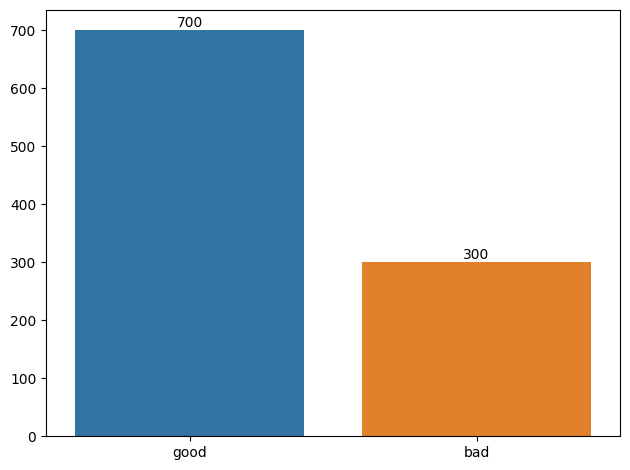

time: 231 ms (started: 2023-08-27 21:07:38 +00:00)


In [375]:
label = dataset['label'].value_counts()
x = sns.barplot(x=label.index, y=label.values)
x.bar_label(x.containers[0])
plt.tight_layout()
plt.show()

**Conclusão:** O gráfico acima mostra um grande desequilíbrio de classes. Levando em conta o problema, considero um desequilíbrio natural uma  vez que há muito mais pessoas com equilíbrio financeiro e consideradas boas pagadoras do que o contrário.

### Categorical
Vou visualizar todos os atributos categóricos de uma vez usando a função subplots(). Isso será feito da seguinte forma. Cada gráfico terá apenas duas barras, uma representando os usuários considerados bons pagadores(label='good') e a outra representando os maus pagadores(label='bad'). Ambas serão constituídas por sub-barras empilhadas representando as classes de um atributo.

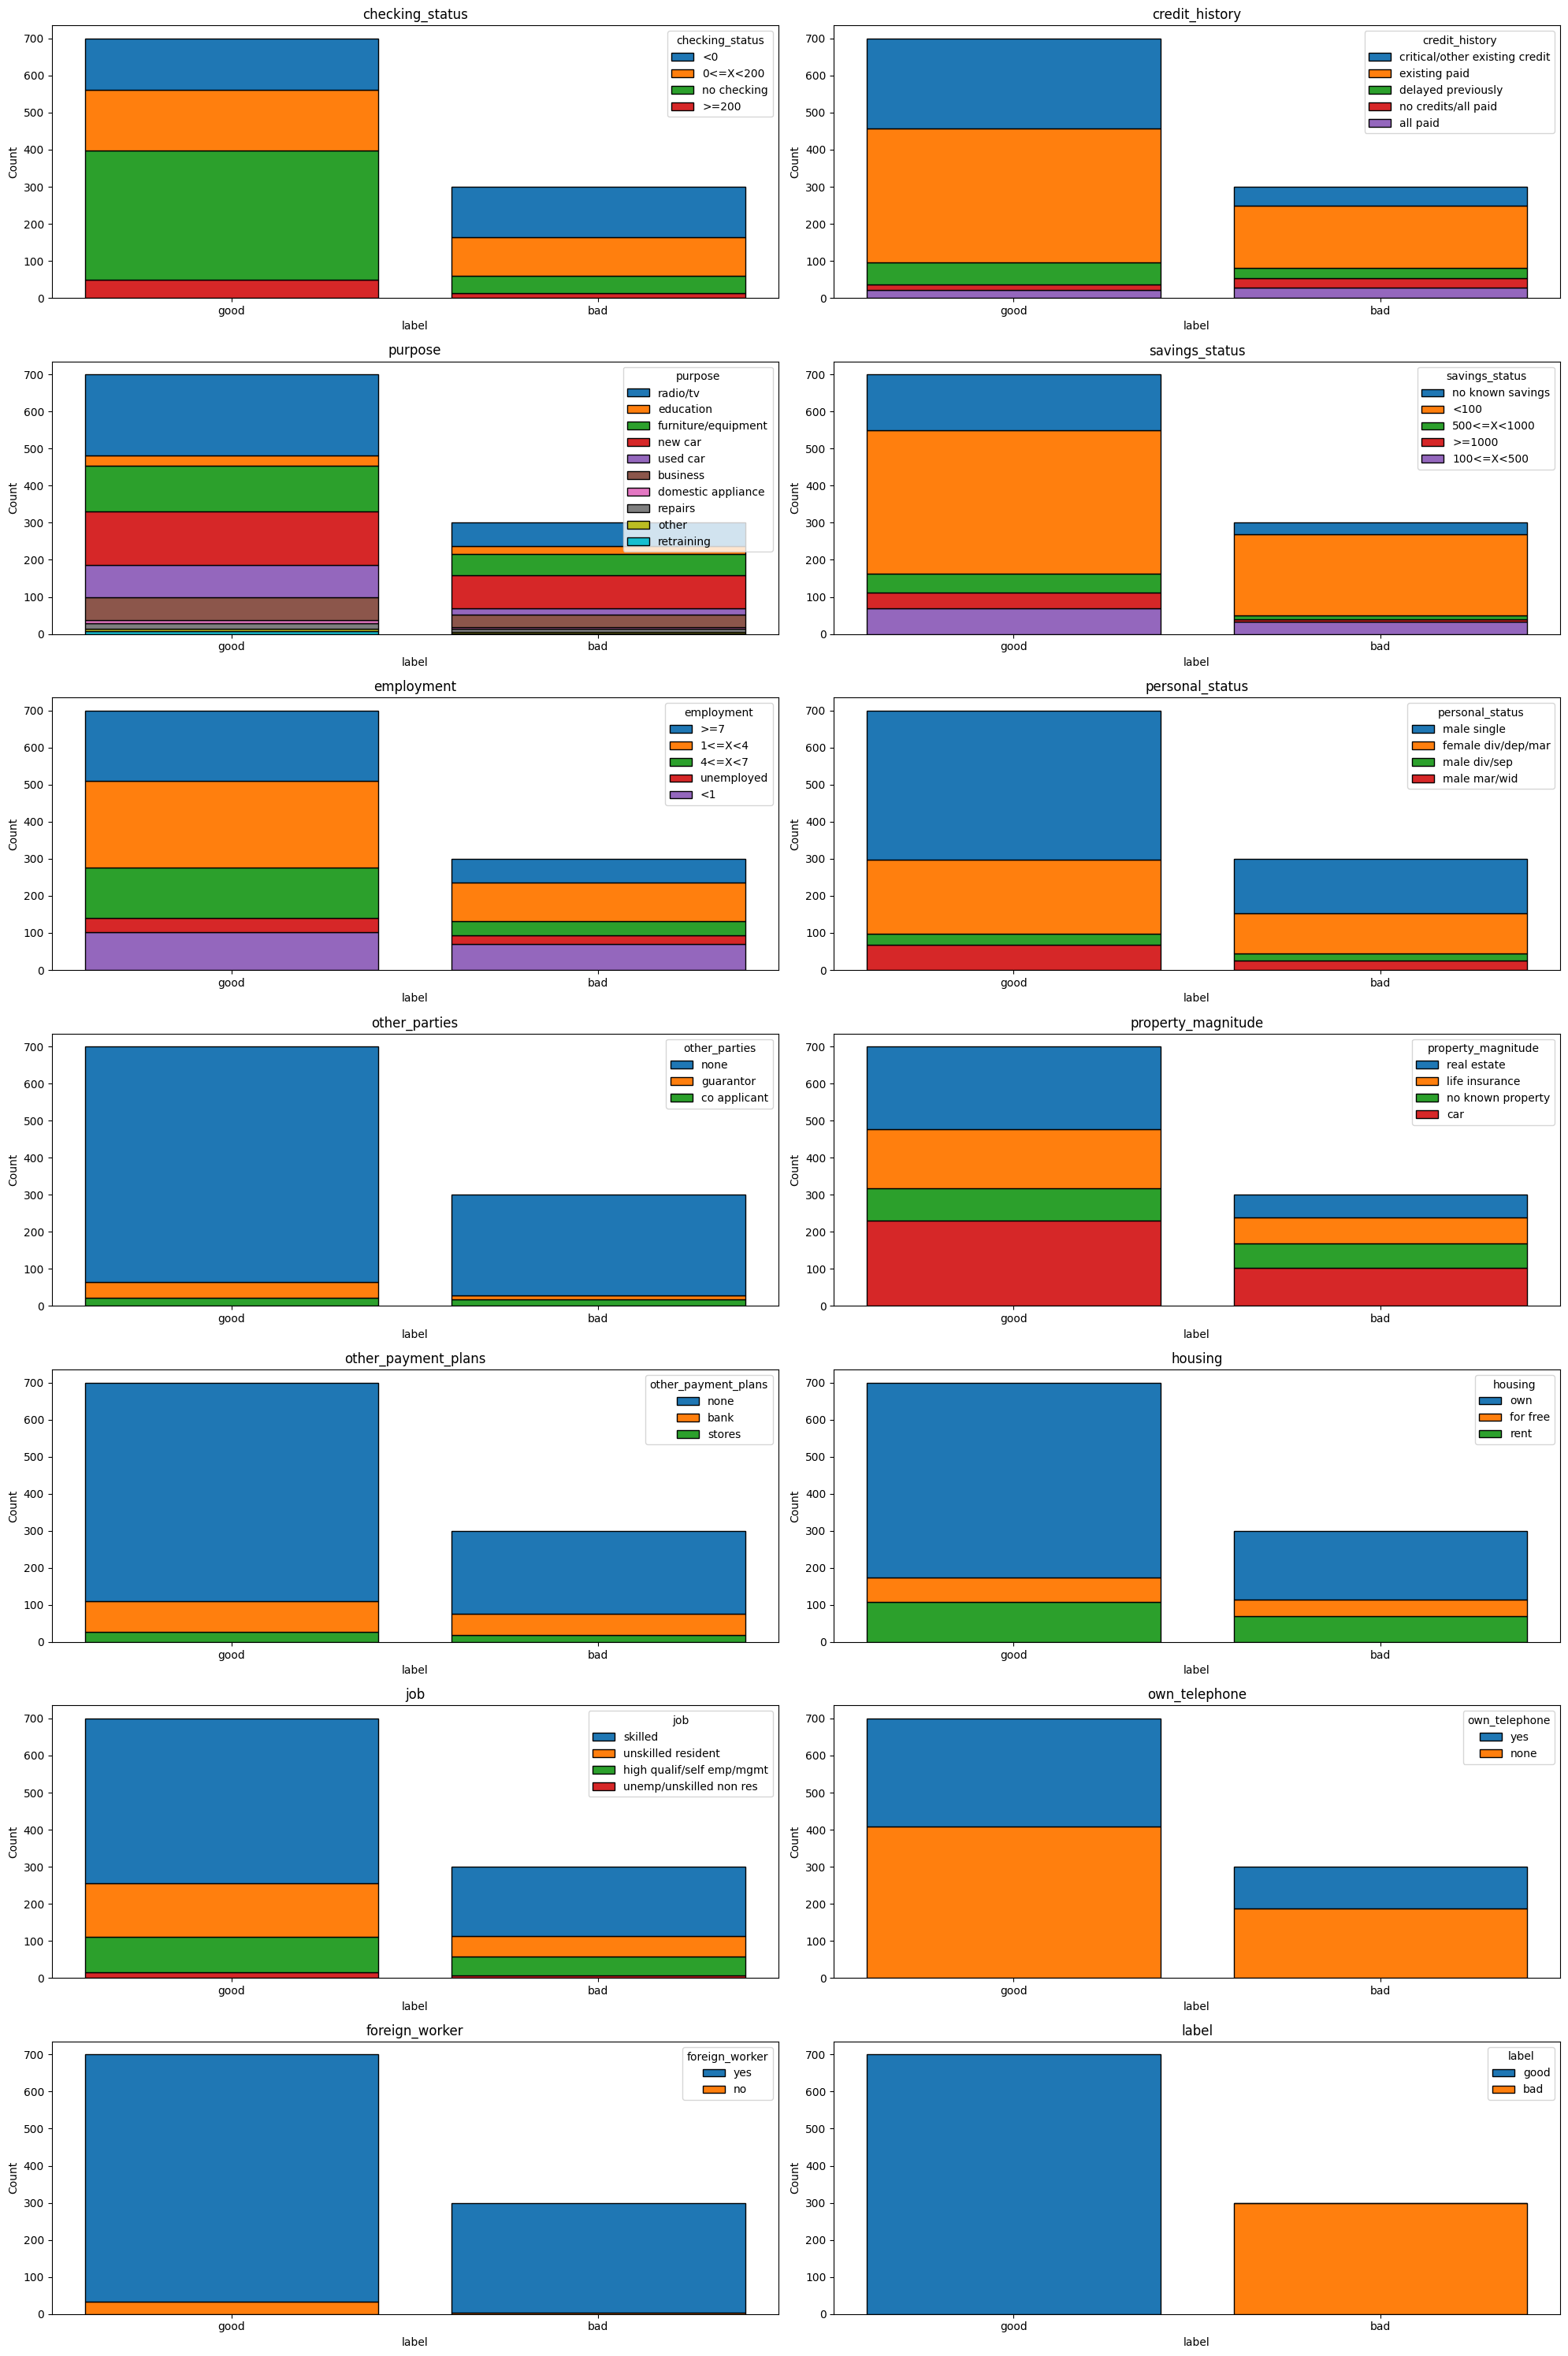

time: 5.42 s (started: 2023-08-27 21:07:38 +00:00)


In [376]:
fig, ax = plt.subplots(7, 2, figsize=(20, 30))
for name, axis in zip(dataset[categorical], ax.ravel()):
  sns.histplot(data=dataset, x='label', hue=name, alpha=1.0, multiple='stack', shrink=0.8, ax=axis)
  axis.set_title(name)
plt.tight_layout()
plt.show()

**Conclusão:** Abaixo, os padrões que mais se destacam nos gráficos.
*   label x checking_status: A maioria dos que são bons pagadores não têm conta corrente enquanto que a maioria dos maus pagadores se dividem em dois grupos:
   *   clientes cuja conta corrente é negativa;
   *   clientes que têm até 200 dolares.
*   label x purpose: A maioris dos bons pagadores usam o dinheiro do empréstimo para comprar radio/tv. Já os maus pagadores, usam o dinheiro para comprar automoveis.
Os outros gráficos apresentam padrões muito semelhantes de classes entre os maus pagadores e os bons.

---

### Numerical
Vou fazer o mesmo tipo de visualização em alguns atributos numéricos discretos.

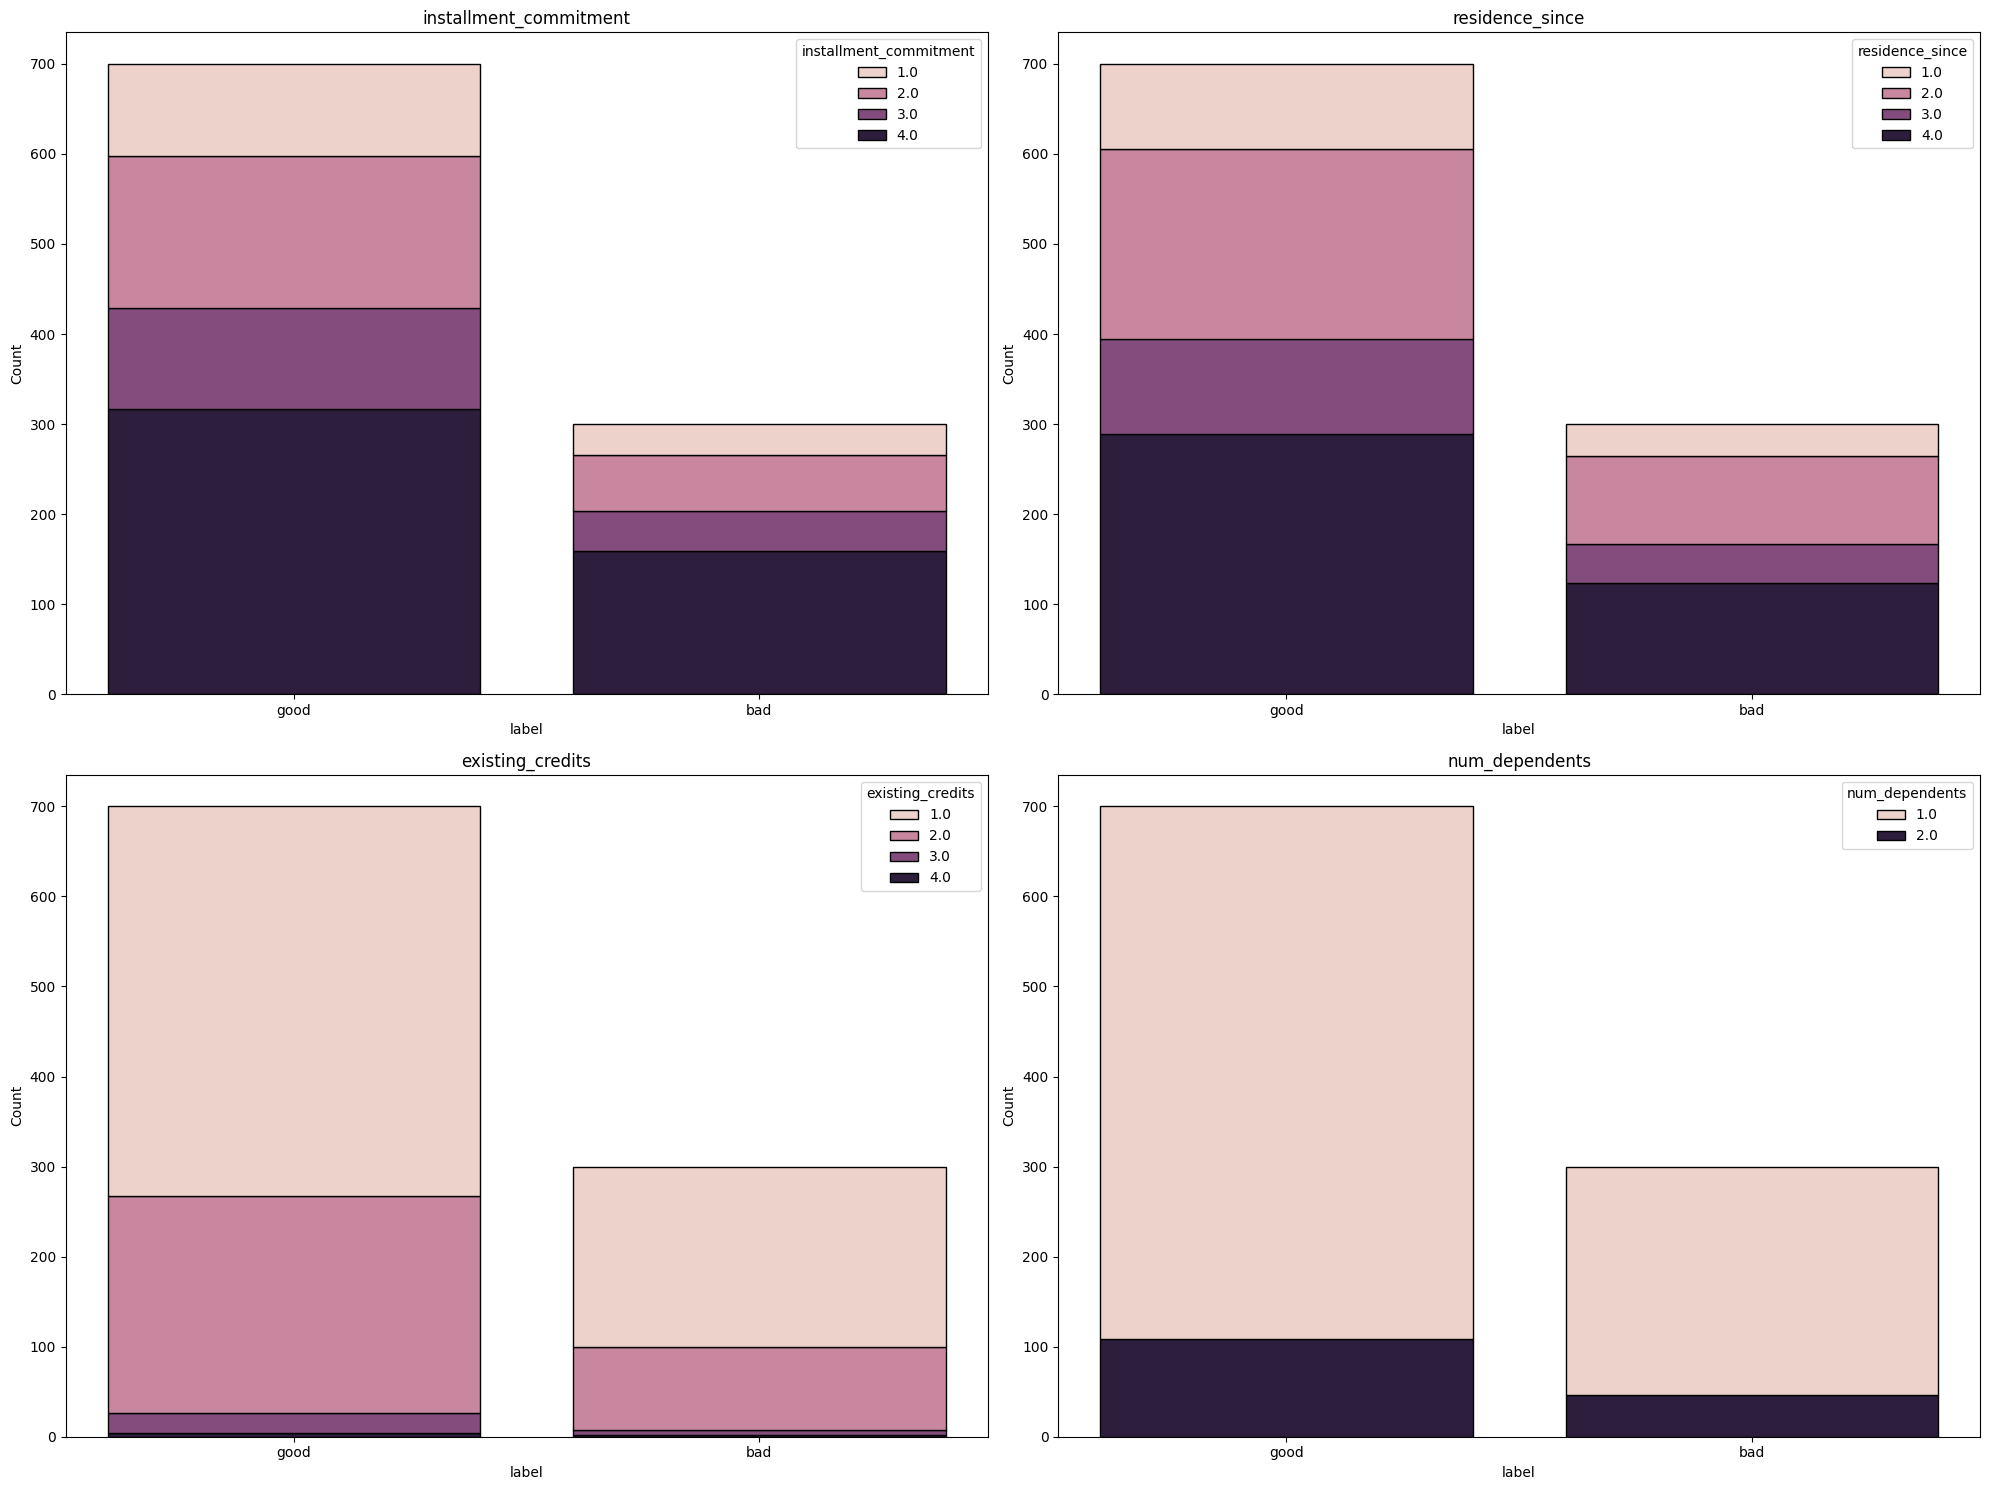

time: 2 s (started: 2023-08-27 21:07:44 +00:00)


In [377]:
discrete = ['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for name, axis in zip(dataset[discrete], ax.ravel()):
  sns.histplot(data=dataset, x='label', hue=name, alpha=1.0, multiple='stack', shrink=0.8, ax=axis)
  axis.set_title(name)
plt.tight_layout()
plt.show()

**Conclusão:** Os padrões identificados em 'good' se repetem em 'bad'. Não há nada visualmente significativo aqui. Quem sabe com um teste de hipóteses como o Qui Quadrado, por exemplo, seja possível identificar quais atributos são mais importantes na rotulação dos clientes.

Agora, com os contínuos, vou visualizá-los individualmente. Primeiro, vou ver a distribuição dos valores de cada atributo. Depois, vou usar a função scatter_matrix() do Pandas que vai criar uma gráfico para cada combinação de atributos. Como são três, serão criados 3^2=9 gráficos.

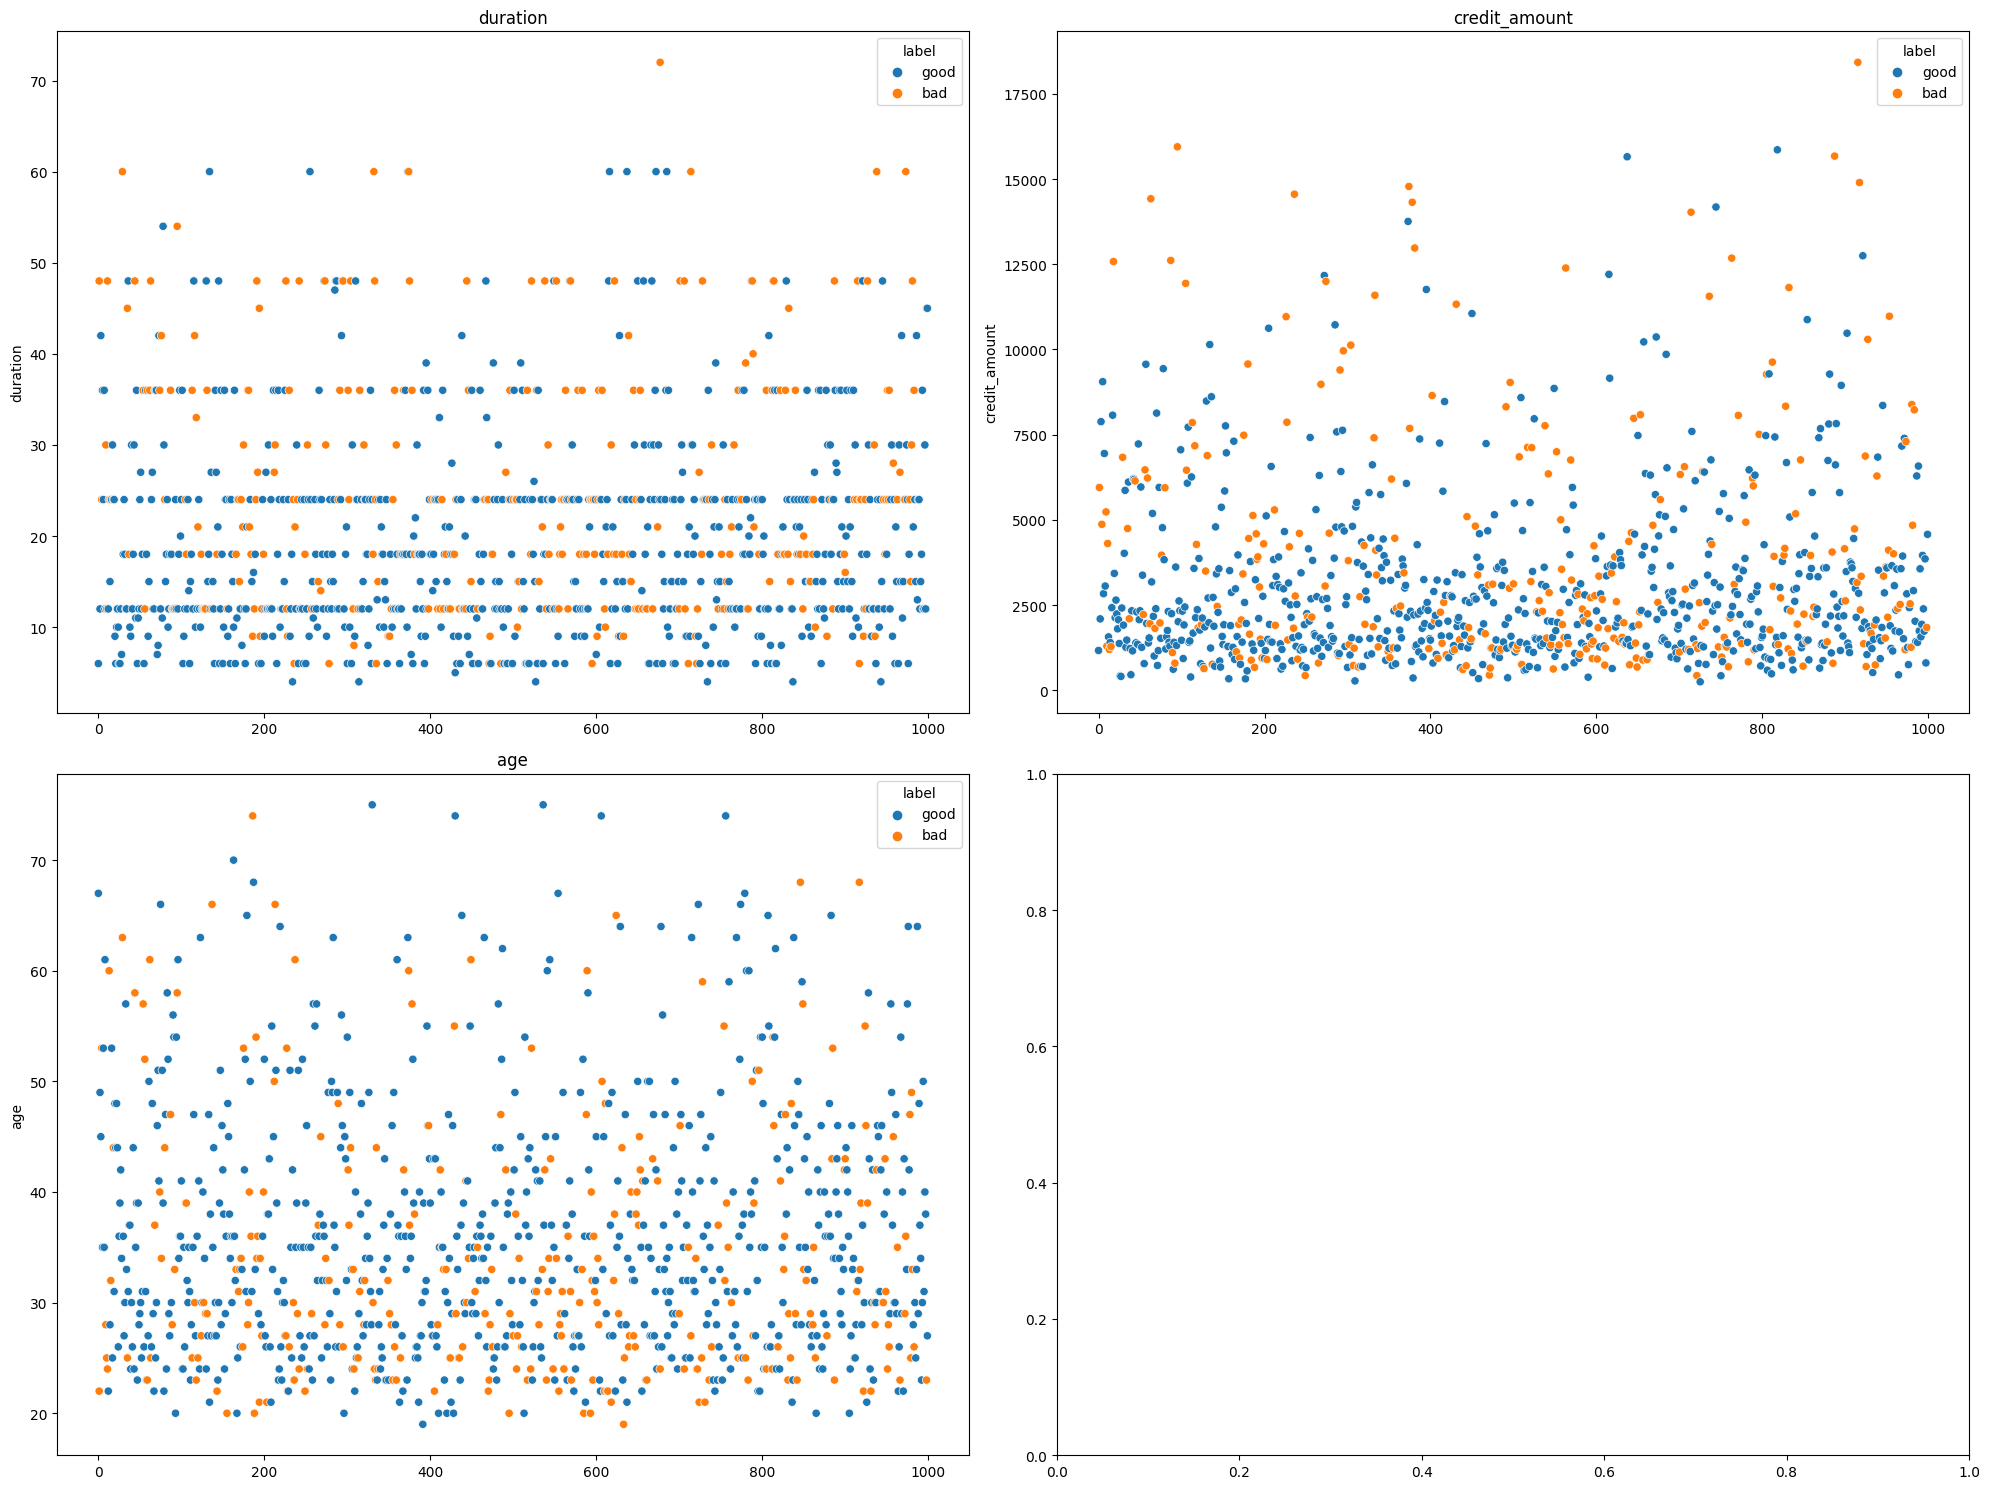

time: 2.44 s (started: 2023-08-27 21:07:46 +00:00)


In [378]:
continuous = ['duration', 'credit_amount', 'age']
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
for name, axis in zip(dataset[continuous], ax.ravel()):
  sns.scatterplot(data=dataset, x=dataset.index, y=name, hue='label', ax=axis)
  axis.set_title(name)
plt.tight_layout()
plt.show()

**Conclusão:** No gráfico (index, duration) há padrões de pontos formando linha horizontais, isso significa que há muitos registros com esses valores o suficiente para que possamos identificar as linhas. Através da função value_counts() nesse atributo, é possível identificar que os números que formam esse padrão em linha são: 12, 18, 24 e 36. Talvez seja interessante remover esses registros para evitar que os modelos preditivos aprendam a reproduzir essas peculiaridades de dados e generalizem melhor.

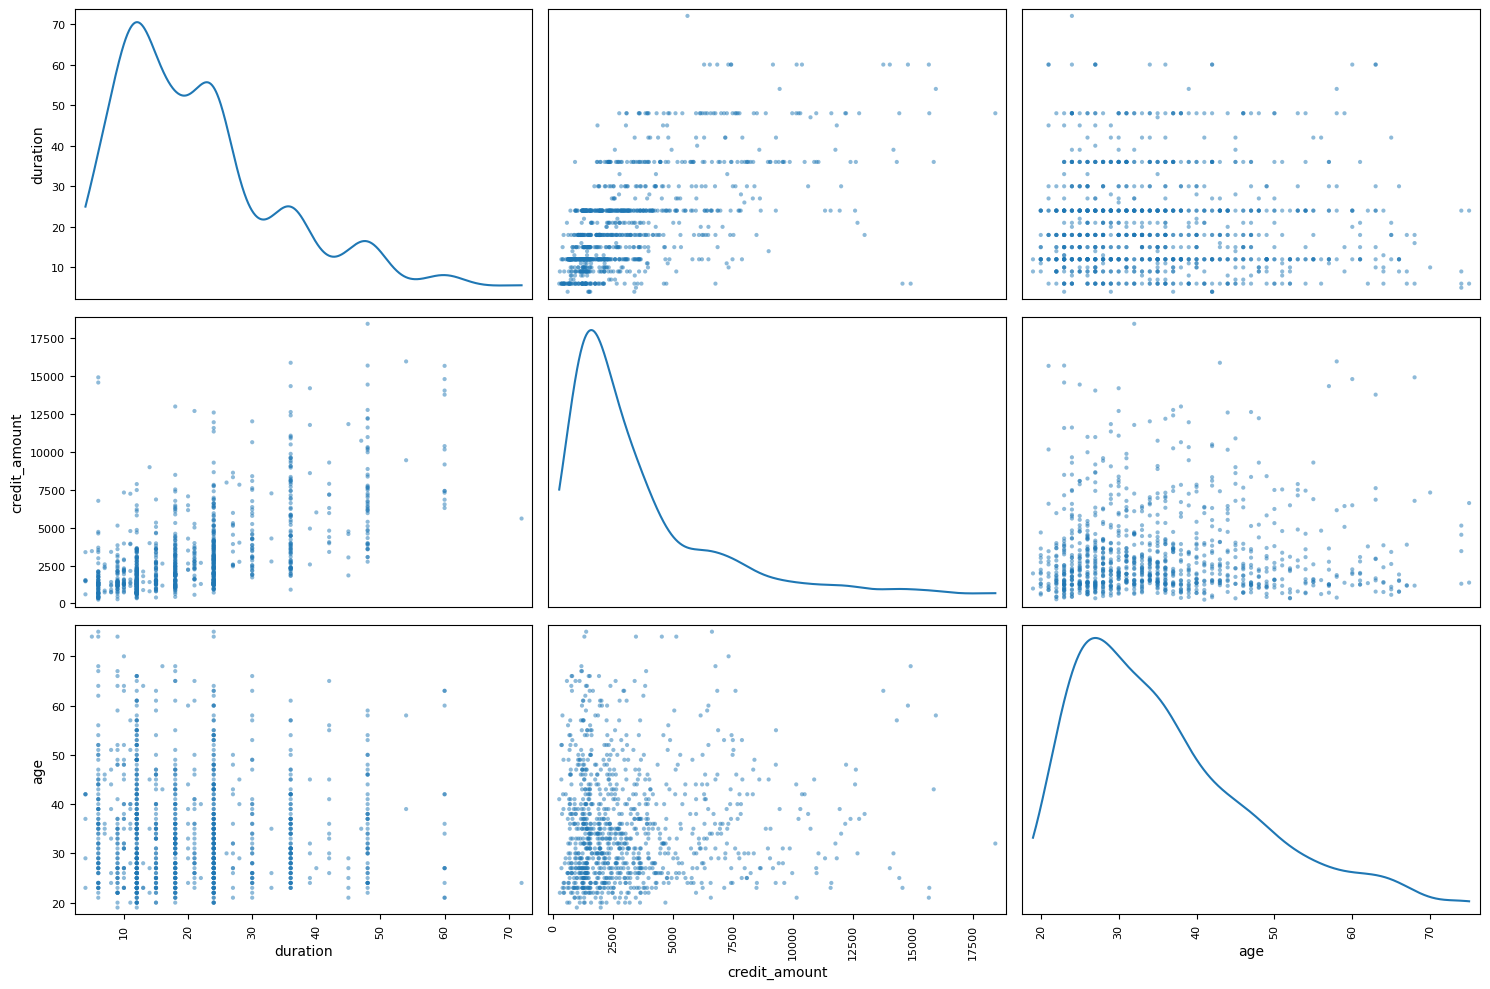

time: 1.41 s (started: 2023-08-27 21:07:48 +00:00)


In [379]:
pd.plotting.scatter_matrix(dataset[continuous], figsize=(15, 10), diagonal='kde')
plt.tight_layout()
plt.show()

**Conclusão:** Os padrões em linha identificados em alguns dos gráficos são resultado do padrão de linha presente em 'duration'. Mas ainda assim é possível ver uma leve correlação crescente em (credit_amount, duration) e (credit_amount, age).
*   credit_amount x duration: Quanto maior o empréstimo maior a sua duração, ou seja, maior o tempo necessário para pagá-lo.
*   credit_amount x age: Quanto mais velhos os clientes, maiores são os empréstimos.


# Train/Test split
Antes de fazer qualquer alteração no conjunto de dados e principalmente treinar modelos, preciso fazer a separação do conjunto em treinamento e teste. Este processo ajuda a evitar overfitting do modelo. Vou levar em conta o desequilíbrio de classes por isso farei uma amostragem estratificada.

Além disso, vou codificar antecipadamente a label pois, no pipeline de transformações, vou precisar que ela esteja codificada para o uso do TargetEncoder. Para isso, vou usar OrdinalEncoder que vai atribuir valor 0 para 'No' e 1 para 'Yes', mas sem aumentar a dimensionalidade, como BinaryEncoder faz. Para atributos binários, OrdinalEncoder pode ser usado pois só vai produzir [0, 1].

In [380]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OrdinalEncoder

time: 626 µs (started: 2023-08-27 21:07:49 +00:00)


In [381]:
y = dataset['label']
X = dataset.drop('label', axis=1)

y = OrdinalEncoder().fit_transform(y.to_numpy().reshape(-1, 1))
y = pd.Series(data=y.ravel())

# vou substitui a label antiga pela nova, codificada
mask = (y.values == 0) # define a classe minoriátia como sendo a positiva
dataset['label'] = mask

skf = StratifiedKFold(n_splits=5, shuffle=True)
result = skf.split(X, y)
train_indexes, test_indexes = next(result) # só o primeiro fold me interessa

train_set = dataset.iloc[train_indexes, :]
test_set  = dataset.iloc[test_indexes, :]

time: 12.2 ms (started: 2023-08-27 21:07:49 +00:00)


# Feature engineering

In [382]:
%pip install category-encoders

time: 5.44 s (started: 2023-08-27 21:07:49 +00:00)


In [383]:
from category_encoders import TargetEncoder
from scipy             import stats
from sklearn.base      import BaseEstimator, TransformerMixin
from sklearn.compose   import ColumnTransformer
from sklearn.pipeline  import Pipeline
import numpy as np

time: 1.13 ms (started: 2023-08-27 21:07:55 +00:00)


A classe ColumnTransformer retorna por padrão um numpy array, mas para gerenciar melhor os atributos que passarão por transformações através de um pipeline, prefiro que ela retorne sempre um objeto DataFrame do Pandas. O problema é que este vem com os nomes das colunas alterados, então resolvi criar a classe abaixo para atribuir ao DataFrame que saiu do ColumnTransformer os nomes originais.

In [384]:
class FeaturesRenamer(BaseEstimator, TransformerMixin):
  """
  Esta classe deve ser colocada diretamente dentro de um Pipeline.
  Quando 'get_feature_names_out()' é chamado ele concatena o nome do transformador ao nome de cada coluna
  que passará pela transformação. Esta classe desfaz isso retornando os nomes originais.
  """
  def __init__(self, original_names):
    if isinstance(original_names, list):
      self.original_names = original_names
    else:
      self.original_names = list(original_names)
  def fit(self, X, y=None):
    return self
  def fit_transform(self, X, y=None):
    self.fit(X, y)
    return self.transform(X, y)
  def transform(self, X, y=None):
    new_names = list()
    for name in list(X.columns):
      for original in self.original_names:
        if name.endswith('__' + original):
          new_names.append(original)
    return X.set_axis(new_names, axis=1)

time: 1.61 ms (started: 2023-08-27 21:07:55 +00:00)


In [385]:
ordinal = ['checking_status', 'savings_status', 'employment', 'job']
nominal = ['credit_history', 'purpose', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing']
binary  = ['own_telephone', 'foreign_worker', 'label']

time: 962 µs (started: 2023-08-27 21:07:55 +00:00)


## Categorical Features

**Etapa ##:** NaN Values: Imputar.

In [386]:
print(dataset[categorical].isnull().values.any())

False
time: 9.29 ms (started: 2023-08-27 21:07:55 +00:00)


**Etapa ##:** Atributos binários: Codificar.

In [387]:
ct_binary = ColumnTransformer(transformers=[('binary_encoder', OrdinalEncoder(dtype=np.int64), binary)], remainder='passthrough')
ct_binary.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary_encoder',
                                 OrdinalEncoder(dtype=<class 'numpy.int64'>),
                                 ['own_telephone', 'foreign_worker', 'label'])])

time: 9.51 ms (started: 2023-08-27 21:07:55 +00:00)


**Etapa ##:** Atributos ordinais: Codificação.

In [388]:
for name in ordinal:
  print(f'{name}: {list(dataset[name].unique())}')

checking_status: ['<0', '0<=X<200', 'no checking', '>=200']
savings_status: ['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500']
employment: ['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1']
job: ['skilled', 'unskilled resident', 'high qualif/self emp/mgmt', 'unemp/unskilled non res']
time: 2.01 ms (started: 2023-08-27 21:07:55 +00:00)


In [389]:
ct_ordinal = ColumnTransformer(transformers=[('ordinal_encoder', OrdinalEncoder(), ordinal)], remainder='passthrough')
ct_ordinal.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_encoder', OrdinalEncoder(),
                                 ['checking_status', 'savings_status',
                                  'employment', 'job'])])

time: 9.36 ms (started: 2023-08-27 21:07:55 +00:00)


**Etapa ##:** Atributos nominais: Codificação

In [390]:
for name in nominal:
  print(f'{name}: {list(dataset[name].unique())}')

credit_history: ['critical/other existing credit', 'existing paid', 'delayed previously', 'no credits/all paid', 'all paid']
purpose: ['radio/tv', 'education', 'furniture/equipment', 'new car', 'used car', 'business', 'domestic appliance', 'repairs', 'other', 'retraining']
personal_status: ['male single', 'female div/dep/mar', 'male div/sep', 'male mar/wid']
other_parties: ['none', 'guarantor', 'co applicant']
property_magnitude: ['real estate', 'life insurance', 'no known property', 'car']
other_payment_plans: ['none', 'bank', 'stores']
housing: ['own', 'for free', 'rent']
time: 5.09 ms (started: 2023-08-27 21:07:55 +00:00)


In [391]:
ct_nominal = ColumnTransformer(transformers=[('target_encoder', TargetEncoder(), nominal)], remainder='passthrough')
ct_nominal.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('target_encoder', TargetEncoder(),
                                 ['credit_history', 'purpose',
                                  'personal_status', 'other_parties',
                                  'property_magnitude', 'other_payment_plans',
                                  'housing'])])

time: 9.06 ms (started: 2023-08-27 21:07:55 +00:00)


## Numerical Features

In [392]:
dataset[numerical].describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


time: 46 ms (started: 2023-08-27 21:07:55 +00:00)


**Etapa ##:** NaN Values: Imputar.

In [393]:
print(dataset[numerical].isnull().values.any())

False
time: 6.3 ms (started: 2023-08-27 21:07:55 +00:00)


**Etapa ##:** Outliers: Substituir.

In [394]:
class OutliersReplacerQT(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass

  def fit(self, X, y=None):
    self.percentiles = list()
    for name in X.columns:
      percentile_low = X[name].quantile(0.0015)
      percentile_top = X[name].quantile(0.9985)
      self.percentiles.append((percentile_low, percentile_top))
    return self

  def fit_transform(self, X, y=None):
    self.fit(X, y)
    return self.transform(X, y)

  def get_feature_names_out(self):
    pass

  def transform(self, X, y=None):
    for percentile, name in zip(self.percentiles, X.columns):
      print(name, percentile[0], percentile[1])
      filter_mask_low = (X[name] < percentile[0])
      filter_mask_top = (X[name] > percentile[1])
      X.loc[filter_mask_low, name] = percentile[0]
      X.loc[filter_mask_top, name] = percentile[1]
    return X



ct_outliers = ColumnTransformer(transformers=[("outliers_replacer_qt", OutliersReplacerQT(), numerical)], remainder='passthrough')
ct_outliers.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('outliers_replacer_qt', OutliersReplacerQT(),
                                 ['duration', 'credit_amount',
                                  'installment_commitment', 'residence_since',
                                  'age', 'existing_credits',
                                  'num_dependents'])])

time: 11.3 ms (started: 2023-08-27 21:07:55 +00:00)


## Full Pipeline

In [395]:
steps = [('ct_binary', ct_binary),
         ('renamer_binary', FeaturesRenamer(dataset.columns)),
         ('ct_ordinal', ct_ordinal),
         ('renamer_ordinal', FeaturesRenamer(dataset.columns)),
         ('ct_nominal', ct_nominal),
         ('renamer_nominal', FeaturesRenamer(dataset.columns)),
         ('ct_outliers', ct_outliers),
         ('renamer_numerical', FeaturesRenamer(dataset.columns)), ]

pipeline_full = Pipeline(steps=steps)
train_set = pipeline_full.fit_transform(train_set, train_set['label'])
test_set  = pipeline_full.transform(test_set)

duration 4.0 60.0
credit_amount 344.7565 15927.532000000003
installment_commitment 1.0 4.0
residence_since 1.0 4.0
age 19.1985 74.80150000000003
existing_credits 1.0 4.0
num_dependents 1.0 2.0
duration 4.0 60.0
credit_amount 344.7565 15927.532000000003
installment_commitment 1.0 4.0
residence_since 1.0 4.0
age 19.1985 74.80150000000003
existing_credits 1.0 4.0
num_dependents 1.0 2.0
time: 247 ms (started: 2023-08-27 21:07:55 +00:00)


# Model Training

In [396]:
from sklearn.metrics  import classification_report, precision_score, recall_score
from sklearn.svm      import SVC
from sklearn.ensemble import ExtraTreesClassifier

time: 736 µs (started: 2023-08-27 21:07:55 +00:00)


## Labeling

In [397]:
y_train = train_set['label']
y_test  = test_set['label']

X_train = train_set.drop('label', axis=1)
X_test  = test_set.drop('label', axis=1)

time: 4.15 ms (started: 2023-08-27 21:07:55 +00:00)


## Additional Functions

In [398]:
def show_pr_score(y_true, y_pred):
  print(f'Precision: {precision_score(y_test, y_pred):.2f}')
  print(f'Recall:    {recall_score(y_test, y_pred):.2f}')

time: 978 µs (started: 2023-08-27 21:07:55 +00:00)


## SVC

In [399]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
show_pr_score(y_test, y_pred)

Precision: 0.67
Recall:    0.07
time: 83.2 ms (started: 2023-08-27 21:07:56 +00:00)


## ExtraTreesClassifier

In [404]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
show_pr_score(y_test, y_pred)

Precision: 0.62
Recall:    0.40
time: 351 ms (started: 2023-08-27 21:15:41 +00:00)
